In [5]:
import pandas as pd

languages = ['en', 'it', 'de', 'es']
lang_to_df = {}

for lang in languages:
    lang_to_df[lang] = pd.read_csv(f'/om2/user/moshepol/prosody/data/raw_audio/{lang}/custom/length.csv')
    print(f'read: {lang}')


read: en
read: it
read: de
read: es


In [6]:
def convert_to_list(val):
    '''
    Takes in the string output from the .csv and turns it into
    a list
    '''
    x = []

    # Empty Value
    if val == '[]':
        return []

    # Only one entry
    if ',' not in val:
        return [val.replace("[", '').replace("]", '').replace("'", '').replace(' ', '')]

    # Otherwise Multiple entries
    array = []
    for x in val.split(','):
        array.extend(convert_to_list(x))

    return array

def key_length(df, key):
    array = []
    for x in df[key]:
        array.extend(convert_to_list(x))

    return len(array)

In [7]:
lang_to_length = {}

for lang, df in lang_to_df.items():
    key_length_dict = {}
    for key in list(df.columns)[2:]:
        key_length_dict[key] = key_length(df, key)

    lang_to_length[lang] = key_length_dict

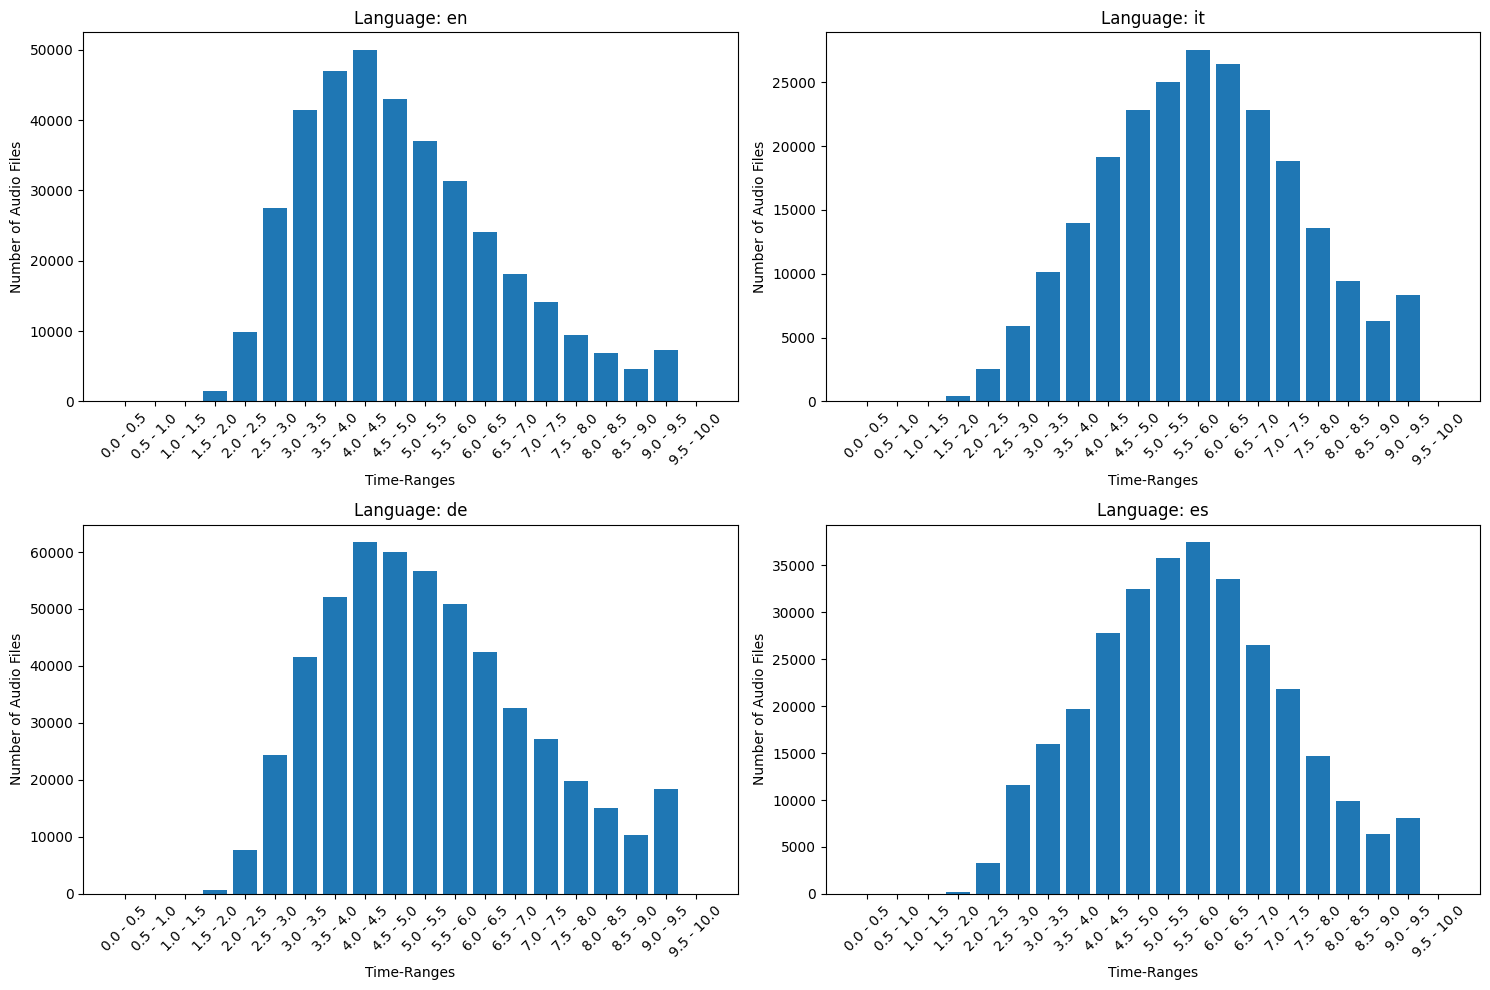

In [8]:
import matplotlib.pyplot as plt

titles = [f'Language: {lang}' for lang in languages]
datasets = [item for _, item in lang_to_length.items()]

fig, axs = plt.subplots(2, 2, figsize=(15, 10))  # 2x2 grid

for i, ax in enumerate(axs.flat):
    keys = list(datasets[i].keys())
    values = list(datasets[i].values())
    
    ax.bar(keys, values)
    ax.set_title(titles[i])
    ax.set_xlabel('Time-Ranges')
    ax.set_ylabel('Number of Audio Files')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig("graphs/histograms.pdf", format="pdf")
